Q.1: What is ‘Curse of Dimensionality’? Explain

The curse of dimensionality is a problem that arises when data consists of high number of features. This type of data is known as high dimensional data. The dimension of the data represent the number of features/columns present in the dataset. The increase in number of features does not always improve the performance of the model. The studies show that, including more number of features might actually leads to worse performance.
The problem with high dimensional data is that it becomes difficult to identify meaningful patterns while analyzing dataa and it degrades the accuracy of model while also decreasing the computation speed. Hence the training becomes slower as the dimensions increase.
With the increase in dimensions, there are more chances for the occurrence of multicollinearity as well.



Q.2: What is feature selection? Why is it needed? What are the different approaches of feature selection?

Feature selection is the process of selecting a minimum number of features such that the probability distribution of different classes, given the values for their features, is as close as possible to original distribution
Feature selection is performed by either including the important features or excluding the irrelevant features in the dataset without changing them.

Feature Selection is needed to avoid the 'Curse of Dimensionality'
It is necessary to provide a pre-processed and good input dataset in order to get better outcomes. It is needed to simplify the model so that it can be easily interpreted by the researchers. It is implemented to reduce the training time and avoid overfitting, enhancing generalization.



There are mainly two types of Feature Selection techniques, which are:

Supervised Feature Selection technique - Consider the target variable and can be used for the labelled dataset.

Unsupervised Feature Selection technique - Ignore the target variable and can be used for the unlabelled dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from itertools import cycle

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
model = LinearDiscriminantAnalysis()


In [4]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.893 (0.033)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [6]:
model.get_params()


{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [7]:
y_pred = model.predict(X_test)
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )


Test Accuracy: 91.0 %


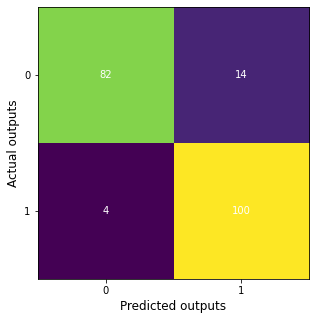

In [8]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        96
           1       0.88      0.96      0.92       104

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [10]:
y_prob = model.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(model.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

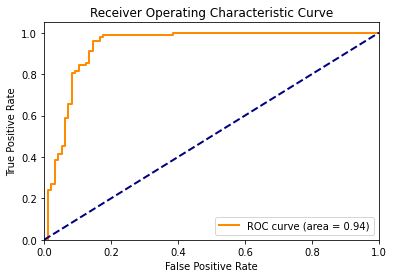

In [11]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()